In [78]:
# Compare the SPECFEM outputs with observations

from obspy import read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
from glob import glob
from scipy.fi


In [79]:
## Inputs
timewin = "2020-01-25-12-00-00"
stname = "A15"
evname = "Hammer1"

root = "/Volumes/OmanData/geophones_no_prefilt/data"

In [80]:
## Read the observed data
inpath = join(root, timewin, f"EventInfo_{evname}.dat")
evdf = pd.read_csv(inpath, sep=" ")

evor = UTCDateTime(evdf["origin_time"][0])

inpath = join(root, timewin, f"*{stname}*.SAC")
stream = read(inpath)

## Cut the data
stream.trim(starttime=evor, endtime=evor+0.5)
stream.detrend("linear")
stream.taper(0.01)
stream.filter("bandpass", freqmin=20.0, freqmax=40.0, corners=4, zerophase=False)

## Normalize the data to the maximum amplitude on the Z component
trace_z = stream.select(component="Z")[0]
obs_z = trace_z.data
maxamp = np.max(np.abs(obs_z))
obs_z /= maxamp

trace_1 = stream.select(component="1")[0]
obs_1 = trace_1.data
obs_1 /= maxamp

trace_2 = stream.select(component="2")[0]
obs_2 = trace_2.data
obs_2 /= maxamp

timeax_obs = trace_z.times()

In [81]:
## Load the SPECFEM data
inpath = join(root, "specfem_output", f"A.{stname}.FXX.semv")
timeax_sem, sem_e = np.loadtxt(inpath, unpack=True)
sem_e

inpath = join(root, "specfem_output", f"A.{stname}.FXY.semv")
timeax_sem, sem_n = np.loadtxt(inpath, unpack=True)

inpath = join(root, "specfem_output", f"A.{stname}.FXZ.semv")
timeax_sem, sem_z = np.loadtxt(inpath, unpack=True)

## Normalize the data to the maximum absolute amplitude on the Z component
maxamp = np.max(np.abs(sem_z))

sem_e /= maxamp
sem_n /= maxamp
sem_z /= maxamp

(-1.5, 1.5)

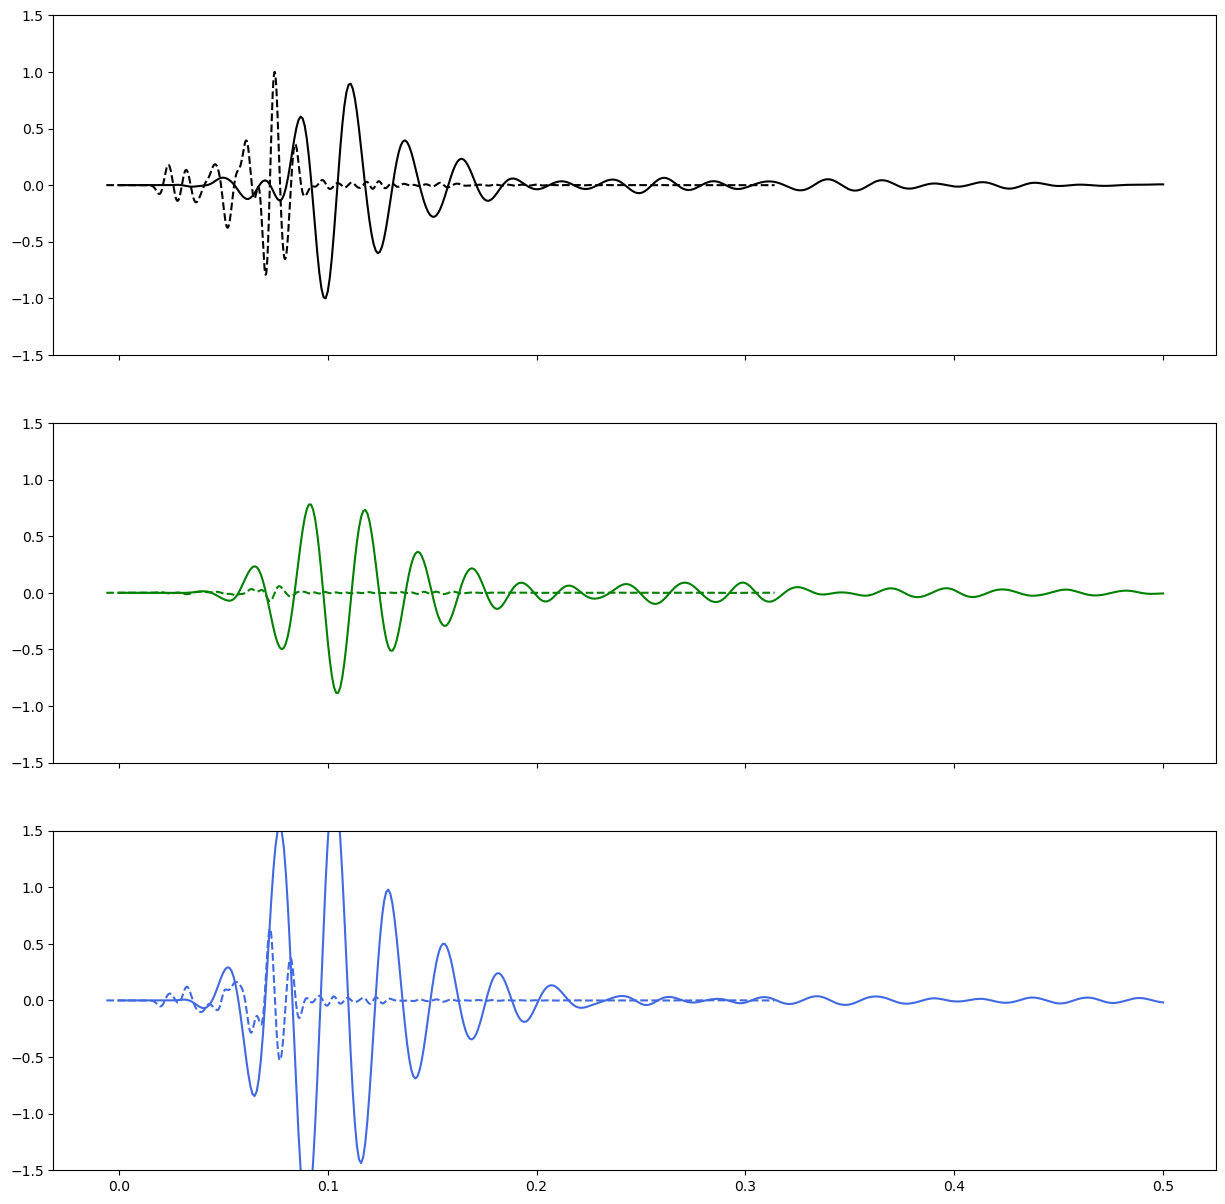

In [82]:
## Plot the data
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 15))

ax[0].plot(timeax_obs, obs_z, label="Observed", color="k", linestyle="-")
ax[0].plot(timeax_sem, sem_z, label="SPECFEM", color="k", linestyle="--")
ax[0].set_ylim(-1.5, 1.5)

ax[1].plot(timeax_obs, obs_1, label="Observed", color="g", linestyle="-")
ax[1].plot(timeax_sem, sem_n, label="SPECFEM", color="g", linestyle="--")
ax[1].set_ylim(-1.5, 1.5)

ax[2].plot(timeax_obs, obs_2, label="Observed", color="royalblue", linestyle="-")
ax[2].plot(timeax_sem, sem_e, label="SPECFEM", color="royalblue", linestyle="--")
ax[2].set_ylim(-1.5, 1.5)



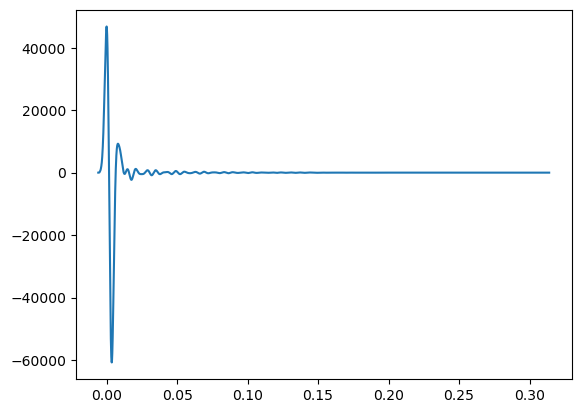

In [85]:
timeax, sem = np.loadtxt(join(root, "specfem_output", f"A.A00.FXZ.semv"), unpack=True)

plt.plot(timeax, sem)